# Численное дифференцирование

## Вариант 20

> <span style="font-style:normal; font-size:12pt;"> 
    <p> Используя правую и цетральные разности численно вычислить первую производную функции f(x) на отрезке [a, b] в узлах сетки. Используя цетральные разности, вычислить вторую производную функции f(x) со вторым и четвертым порядком точности в узлах сетки. </p>

$$
\begin{equation}
f(x) = \frac{x}{1 + tan^2(x)}, \ \ \ {x \in [-1.5, 1.5]}
\end{equation}
$$

In [1]:
На интервале точки с заданным шагом h. Правая разность и центральная разность для точек интервала (первая производная).
Вычислить соответственно погрешности. Определить формулы для второй производной через 
центральную разность с соответств. точностью (возможен выход за интервал). Погрешность log(r) от log(h).
Погрешность r определяется как среднее значение/максимум среди всех точек для заданного параметра h.

Первая производная - точность h и h^2
Вторая производная - точность h^2 и h^4

Кусочно-линейная интерполяция

SyntaxError: invalid syntax (<ipython-input-1-0da783346dd7>, line 1)

In [1]:
import math
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# исходная функция
def f(x):
    return x / (1 + np.power(np.tan(x), 2))

In [7]:
# первая производная
def f1(x):
    return (1 - 2 * x * np.tan(x)) / (1 + np.power(np.tan(x), 2))

# вторая производная
def f2(x):
    return 4 * x * np.tan(x) * (np.tan(x) - 1) / (1 + np.power(np.tan(x), 2))

In [3]:
# интервал [-1.5, 1.5]
a = -1.5
b = 1.5

#### Первая производная 

In [4]:
# Порядок 1

# правая разность
def right_diff(y, yr, h):
    return (yr - y) / h

# левая разность
def left_diff(y, yl, h):
    return (y - yl) / h

In [6]:
# Порядок 2

# правая разность
def right2_diff():
    return

# левая разность
def left2_diff():
    return

# центральная разность
def central_diff1(y1, y2, h):
    return (y2 - y1) / (2 * h)

#### Вторая производная

In [5]:
# Порядок 2

# центральная разность
def central_diff2():
    return


# Порядок 4

# центральная разность
def central_diff4():
    return

In [8]:
# # вторая производная
# def f2(x):
#     return 4 * np.tan(x) * x * (np.tan(x) - 1) / (1 + np.power(np.tan(x), 2))

In [9]:
# # третья производная
# def f3(x):
#     a1 = 1 - 2 * x * np.tan(x)
#     a2 = 4 * np.tan(x) * (np.tan(x) - 1)
#     a3 = 1 + np.power(np.tan(x), 2)
#     a4 = 8 * x * np.tan(x)
#     return a1 * a2 / a3  + a4 - 4 * x

In [10]:
# исходная функция (точки для построения гладкого графика)
x_plot = np.linspace(a, b, 1000)
y_plot = [f(x) for x in x_plot]

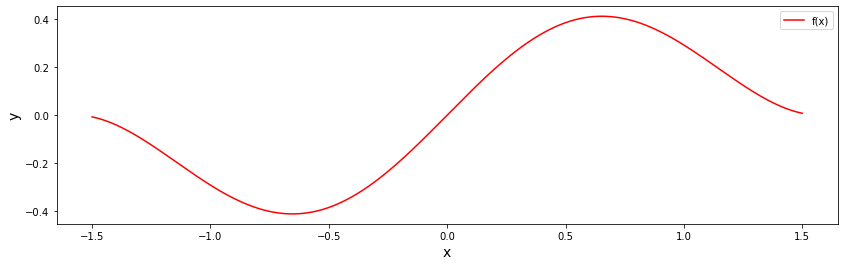

In [11]:
# график исходной функции
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(x_plot, y_plot, color="red", label='f(x)')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

ax.legend()

plt.show()

In [33]:
# шаг узлов сетки
# h = float(input("Input step h: "))

H_plot = np.arange(0.1, b - a, 0.001)
# H_plot = np.linspace(0.1, b - a, int(np.trunc((b - a) / 0.0001)))

print(H_plot)

[0.1   0.101 0.102 ... 2.997 2.998 2.999]


In [34]:
# # узлы сетки
# x1_plot = np.linspace(a, b, int(np.trunc((b - a) / h)))
# y1_plot = [f(x) for x in x1_plot]

### 1. Погрешность первого порядка

In [35]:
R1_plot = []

for h in H_plot:
   
    x0_plot = np.linspace(a, b, int(np.trunc((b - a) / h)))
    y0_plot = [f(x) for x in x0_plot]

    R1_plot_h = []
    
    for i in range(len(x0_plot)):
        if (i != len(x0_plot) - 1):
            fdiff = right_diff(y0_plot[i],  y0_plot[i + 1], h)
            R1 = abs(f1(x0_plot[i]) - fdiff)
            R1_plot_h.append(R1)
        else:
            fdiff = left_diff(y0_plot[i], y0_plot[i - 1], h)
            R1 = abs(f(x0_plot[i]) - fdiff)
            R1_plot_h.append(R1)
            
    R1_plot.append(max(R1_plot_h))
    
    
d = {'H': H_plot, 'R1': R1_plot}
df = pd.DataFrame(data=d)
df

,H,R1
0,0.100,0.352185
1,0.101,0.365248
2,0.102,0.361741
3,0.103,0.358302
4,0.104,0.372395
...,...,...
2895,2.995,0.007506
2896,2.996,0.007506
2897,2.997,0.007506
2898,2.998,0.007506


In [36]:
# R_plot = []

# for h in H_plot:
    
#     R_plot_h = []
    
#     x2_plot = np.linspace(a, b, int(np.trunc((b - a) / h)))
#     y2_plot = [f2(x) for x in x2_plot]
    
#     for y2 in y2_plot:
#         R_plot_h.append(h / 2 * abs(y2))
        
#     R_plot.append(max(R_plot_h))

# d = {'H': H_plot, 'R': R_plot}
# df = pd.DataFrame(data=d)
# df

In [37]:
lnH_plot = [np.log(h) for h in H_plot]
lnR1_plot = [np.log(r) for r in R1_plot]

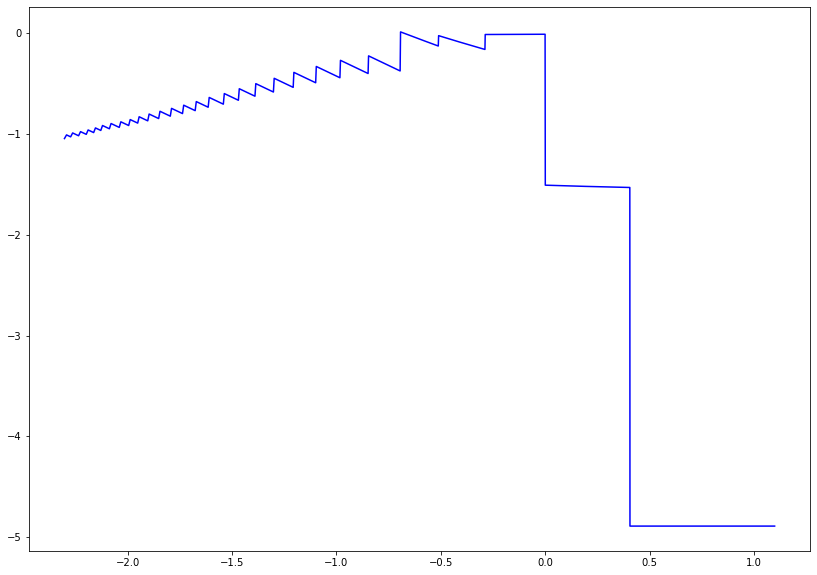

In [38]:
# график исходной функции
fig, ax = plt.subplots(figsize=(14, 10))

# ax.scatter(lnH_plot, lnR1_plot, color="red")
ax.plot(lnH_plot, lnR1_plot, color="blue")

# ax.set_xlabel("x", fontsize=14)        
# ax.set_ylabel("y", fontsize=14)

# ax.legend()

plt.show()

In [48]:
# центральные разности в узлах сетки

fdiffs_central_matrix = []

for h in H_plot:
    
    x0_plot = np.linspace(a, b, int(np.trunc((b - a) / h)))
    y0_plot = [f(x) for x in x0_plot]
    
    fdiffs_central = []
 
    for i in range(1, len(x0_plot)):
        # левая граница
        if i == 0:
            y_ = f(x0_plot[0] - h)
            fdiff_central = central_diff(y_, y0_plot[1], h)
            fdiffs_central.append(fdiff_central)
            continue
        
        if not(i + 1 > len(y0_plot) - 1):
            fdiff_central = central_diff(y0_plot[i - 1],  y0_plot[i + 1], h)
            fdiffs_central.append(fdiff_central)
        else:
            y_ = f(x0_plot[i] + h)
            fdiff_central = central_diff(y0_plot[i - 1],  y_, h)
            fdiffs_central.append(fdiff_central)

#     print(fdiffs_right, end='\n\n')
    fdiffs_central_matrix.append(fdiffs_central)
    
d = {'H': H_plot, 'Derivatives': fdiffs_central_matrix}
df = pd.DataFrame(data=d)
df

,H,Derivatives
0,0.1,"[-0.44836484193284926, -0.6131897019223468, -0..."
1,0.2,"[-0.5954780230989181, -0.6639869189329826, -0...."
2,0.3,"[-0.6154603790739072, -0.3411408188685492, 0.3..."
3,0.4,"[-0.4719624361467113, 0.36490822715803595, 0.9..."
4,0.5,"[-0.2662947146867859, 0.6215593996245624, 0.62..."
5,0.6,"[0.0062546896247215895, 0.6692107510423143, 0...."
6,0.7,"[0.2804151457262149, 0.2804151457262149, 0.269..."
7,0.8,"[0.009382034437082385, 0.6381403712654293]"
8,0.9,"[0.008339586166295453, 0.7249993222929643]"
9,1.0,"[0.007505627549665908, 0.8022888659145165]"


In [59]:
R_plot = []

for h in H_plot:
    
    R_plot_h = []
    
    x2_plot = np.linspace(a, b, int(np.trunc((b - a) / h)))
    y2_plot = [f3(x) for x in x2_plot]
    
    for y2 in y2_plot:
        R_plot_h.append(h**2 / 3 * abs(y2))
        
    R_plot.append(max(R_plot_h))

d = {'H': H_plot, 'R': R_plot}
df = pd.DataFrame(data=d)
df

,H,R
0,0.1,0.034948
1,0.2,0.139792
2,0.3,0.314533
3,0.4,0.559169
4,0.5,0.873702
5,0.6,1.258130
6,0.7,1.712455
7,0.8,2.236676
8,0.9,2.830793
9,1.0,3.494807


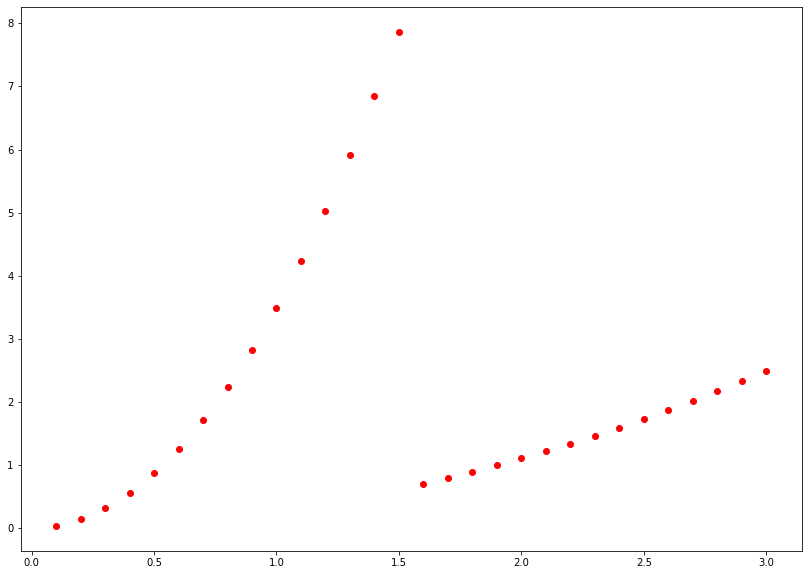

In [60]:
# график исходной функции
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(H_plot, R_plot, color="red")
# ax.plot(H_plot, R_plot, color="red")

# ax.set_xlabel("x", fontsize=14)        
# ax.set_ylabel("y", fontsize=14)

# ax.legend()

plt.show()

In [66]:
# # центральные разности в узлах сетки

# first_derivatives = []

# for i in range(1, len(x1_plot) - 1):
#     first_derivative = central_diff(x1_plot[i], y1_plot[i + 1], y1_plot[i - 1], h)
#     first_derivatives.append(first_derivative)

# for i in range(1, len(x1_plot) - 1):
#     print("x* = {0:.4f}, f'(x*) = {1:.4f}".format(x1_plot[i], first_derivatives[i - 1]))

x* = -0.9000, f'(x*) = 0.2663
x* = -0.3000, f'(x*) = -0.6216
x* = 0.3000, f'(x*) = -0.6216
x* = 0.9000, f'(x*) = 0.2663


In [67]:
# # правая разность на левой границе
# first_derivative = right_diff(x1_plot[0], y1_plot[0], y1_plot[1], h)
# first_derivatives.insert(0, first_derivative)

# # левая разность на правой границе
# first_derivative = left_diff(x1_plot[len(x1_plot) - 1], y1_plot[len(x1_plot) - 1], y1_plot[len(x1_plot) - 2], h)
# first_derivatives.append(first_derivative)

In [69]:
# for i in range(0, len(x1_plot)):
#     print("x* = {0:.4f}, f'(x*) = {1:.4f}".format(x1_plot[i], first_derivatives[i]))

x* = -1.5000, f'(x*) = -0.6805
x* = -0.9000, f'(x*) = 0.2663
x* = -0.3000, f'(x*) = -0.6216
x* = 0.3000, f'(x*) = -0.6216
x* = 0.9000, f'(x*) = 0.2663
x* = 1.5000, f'(x*) = -0.6805
